![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

# 1. Exploratory data analysis

In [27]:
# Start your code here!
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)

In [28]:
# Load men's and women's results data
men_data <- read.csv("men_results.csv")
women_data <- read.csv("women_results.csv")

# View the structure of the data
str(men_data)
str(women_data)

'data.frame':	44353 obs. of  7 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ date      : chr  "1872-11-30" "1873-03-08" "1874-03-07" "1875-03-06" ...
 $ home_team : chr  "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr  "England" "Scotland" "England" "Scotland" ...
 $ home_score: int  0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: int  0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
'data.frame':	4884 obs. of  7 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ date      : chr  "1969-11-01" "1969-11-01" "1969-11-02" "1969-11-02" ...
 $ home_team : chr  "Italy" "Denmark" "England" "Italy" ...
 $ away_team : chr  "France" "England" "France" "Denmark" ...
 $ home_score: int  1 4 2 3 3 0 3 3 3 0 ...
 $ away_score: int  0 3 0 1 2 2 0 0 0 2 ...
 $ tournament: chr  "Euro" "Euro" "Euro" "Euro" ...


In [29]:
# View the first few rows of the data
head(men_data)
head(women_data)

,X,date,home_team,away_team,home_score,away_score,tournament
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,0,1872-11-30,Scotland,England,0,0,Friendly
2,1,1873-03-08,England,Scotland,4,2,Friendly
3,2,1874-03-07,Scotland,England,2,1,Friendly
4,3,1875-03-06,England,Scotland,2,2,Friendly
5,4,1876-03-04,Scotland,England,3,0,Friendly
6,5,1876-03-25,Scotland,Wales,4,0,Friendly


,X,date,home_team,away_team,home_score,away_score,tournament
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,0,1969-11-01,Italy,France,1,0,Euro
2,1,1969-11-01,Denmark,England,4,3,Euro
3,2,1969-11-02,England,France,2,0,Euro
4,3,1969-11-02,Italy,Denmark,3,1,Euro
5,4,1975-08-25,Thailand,Australia,3,2,AFC Championship
6,5,1975-08-25,Hong Kong,New Zealand,0,2,AFC Championship


In [30]:
# Glimpse of men's and women's data
glimpse(men_data)
glimpse(women_data)

# Unique tournament values in men's and women's data
unique_tournaments_men <- unique(men_data$tournament)
unique_tournaments_women <- unique(women_data$tournament)

print(unique_tournaments_men)
print(unique_tournaments_women)

Rows: 44,353
Columns: 7
$ X          <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ date       <chr> "1872-11-30", "1873-03-08", "1874-03-07", "1875-03-06", "18…
$ home_team  <chr> "Scotland", "England", "Scotland", "England", "Scotland", "…
$ away_team  <chr> "England", "Scotland", "England", "Scotland", "England", "W…
$ home_score <int> 0, 4, 2, 2, 3, 4, 1, 0, 7, 9, 2, 5, 0, 5, 2, 5, 0, 1, 1, 0,…
$ away_score <int> 0, 2, 1, 2, 0, 0, 3, 2, 2, 0, 1, 4, 3, 4, 3, 1, 1, 6, 5, 13…
$ tournament <chr> "Friendly", "Friendly", "Friendly", "Friendly", "Friendly",…
Rows: 4,884
Columns: 7
$ X          <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ date       <chr> "1969-11-01", "1969-11-01", "1969-11-02", "1969-11-02", "19…
$ home_team  <chr> "Italy", "Denmark", "England", "Italy", "Thailand", "Hong K…
$ away_team  <chr> "France", "England", "France", "Denmark", "Australia", "New…
$ home_score <int> 1, 4, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 5, 3, 5, 2, 1, 5, 

# 2. Filtering the data

In [31]:
# Filter men's data for matches in a specific tournament
men_data_f<- men_data %>% 
                     filter(tournament == "FIFA World Cup" & date > as.Date("2002-01-01"))

# Filter women's data for matches in the same specific tournament
women_data_f <- women_data %>% 
                       filter(tournament == "FIFA World Cup" & date > as.Date("2002-01-01"))

str(men_data_f)
str(women_data_f)

'data.frame':	384 obs. of  7 variables:
 $ X         : int  25164 25165 25166 25167 25168 25169 25170 25171 25172 25173 ...
 $ date      : chr  "2002-05-31" "2002-06-01" "2002-06-01" "2002-06-01" ...
 $ home_team : chr  "France" "Germany" "Republic of Ireland" "Uruguay" ...
 $ away_team : chr  "Senegal" "Saudi Arabia" "Cameroon" "Denmark" ...
 $ home_score: int  0 8 1 1 1 1 2 3 2 0 ...
 $ away_score: int  1 0 1 2 0 1 2 1 1 1 ...
 $ tournament: chr  "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
'data.frame':	200 obs. of  7 variables:
 $ X         : int  1600 1601 1602 1603 1604 1605 1606 1607 1609 1610 ...
 $ date      : chr  "2003-09-20" "2003-09-20" "2003-09-20" "2003-09-20" ...
 $ home_team : chr  "Nigeria" "Norway" "Germany" "Japan" ...
 $ away_team : chr  "North Korea" "France" "Canada" "Argentina" ...
 $ home_score: int  0 2 4 6 3 3 1 1 1 1 ...
 $ away_score: int  3 0 1 0 1 0 2 0 4 0 ...
 $ tournament: chr  "FIFA World Cup" "FIFA World Cup" "FIFA World Cu

In [32]:
head(men_data_f)
head(women_data_f)

,X,date,home_team,away_team,home_score,away_score,tournament
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
2,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
3,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
4,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
5,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
6,25169,2002-06-02,England,Sweden,1,1,FIFA World Cup


,X,date,home_team,away_team,home_score,away_score,tournament
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
2,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
3,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
4,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
5,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
6,1605,2003-09-21,Brazil,South Korea,3,0,FIFA World Cup


# 3. Calculating the test values
***Conducting the hypothesis test requires calculating the goals scored for both men's and women's matches.***

In [33]:
# Mutate men's data to create a new column for total goals scored
men_data_f <- men_data_f %>%
            mutate(total_goals = home_score + away_score)

# Repeat the previous step for women's data
women_data_f <- women_data_f %>%
              mutate(total_goals = home_score + away_score)

# View the first few rows of the updated data
head(men_data_f)
head(women_data_f)


,X,date,home_team,away_team,home_score,away_score,tournament,total_goals
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
2,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
3,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
4,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
5,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
6,25169,2002-06-02,England,Sweden,1,1,FIFA World Cup,2


,X,date,home_team,away_team,home_score,away_score,tournament,total_goals
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
2,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
3,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
4,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
5,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
6,1605,2003-09-21,Brazil,South Korea,3,0,FIFA World Cup,3


# 5. EDA

- ## Visualization

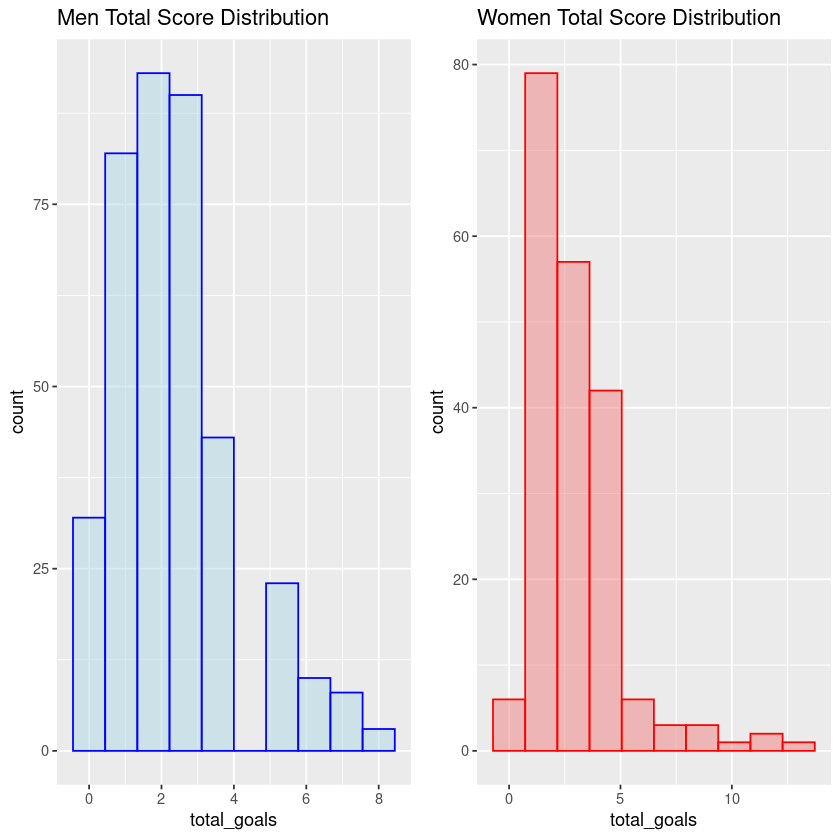

In [34]:
# Create a histogram of men's and women's total score distribution
men_hist <- ggplot(data = men_data_f, aes(x = total_goals)) +
  geom_histogram(bins = 10, color = "blue", fill = 'lightblue', alpha = 0.5) +
  ggtitle('Men Total Score Distribution')

women_hist <- ggplot(data = women_data_f, aes(x = total_goals)) +
  geom_histogram(bins = 10, color = 'red', fill = 'lightcoral', alpha = 0.5) +
  ggtitle('Women Total Score Distribution')


grid.arrange(men_hist, women_hist, ncol = 2)

In [35]:
# Unpaired t-test
t_test_result <- t.test(total_goals ~ Gender, data = rbind(data.frame(Gender = "Men", men_data_f), data.frame(Gender = "Women", women_data_f)))

# Wilcoxon-Mann-Whitney test
wilcox_test_result <- wilcox.test(total_goals ~ Gender, data = rbind(data.frame(Gender = "Men", men_data_f), data.frame(Gender = "Women", women_data_f)))

- ## t-test

In [36]:
print(t_test_result)


	Welch Two Sample t-test

data:  total_goals by Gender
t = -2.8128, df = 340.1, p-value = 0.005196
alternative hypothesis: true difference in means between group Men and group Women is not equal to 0
95 percent confidence interval:
 -0.7935305 -0.1404278
sample estimates:
  mean in group Men mean in group Women 
           2.513021            2.980000 



- ## Wilcoxon-Mann-Whitney test

In [37]:
print(wilcox_test_result)


	Wilcoxon rank sum test with continuity correction

data:  total_goals by Gender
W = 33527, p-value = 0.01021
alternative hypothesis: true location shift is not equal to 0



Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.

Additionally, you can also use quantile-quantile (Q-Q) plots for further assessment of normality:

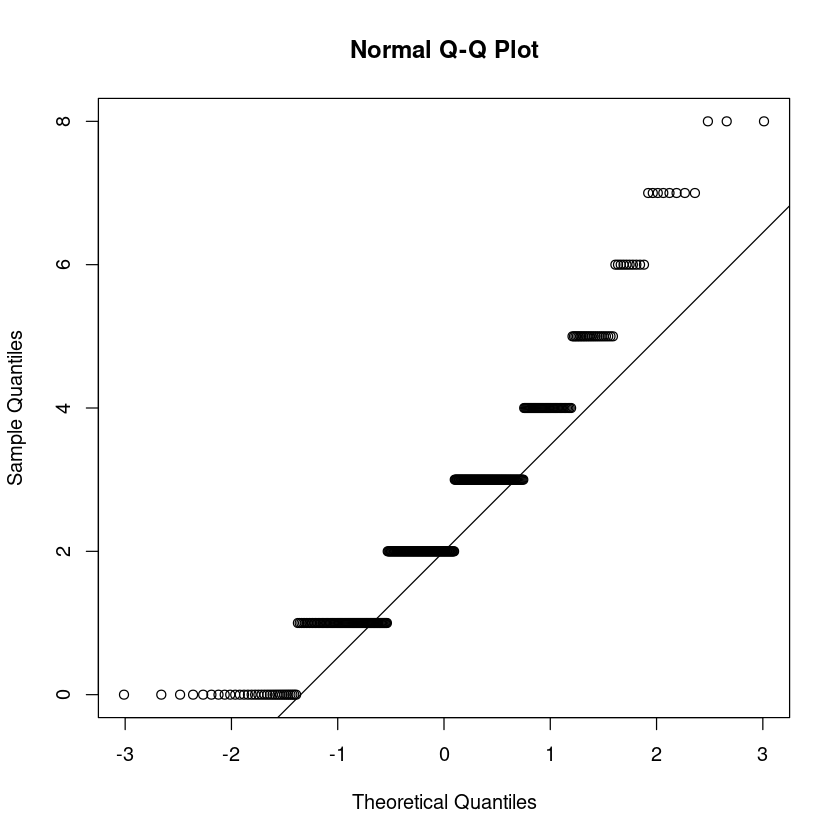

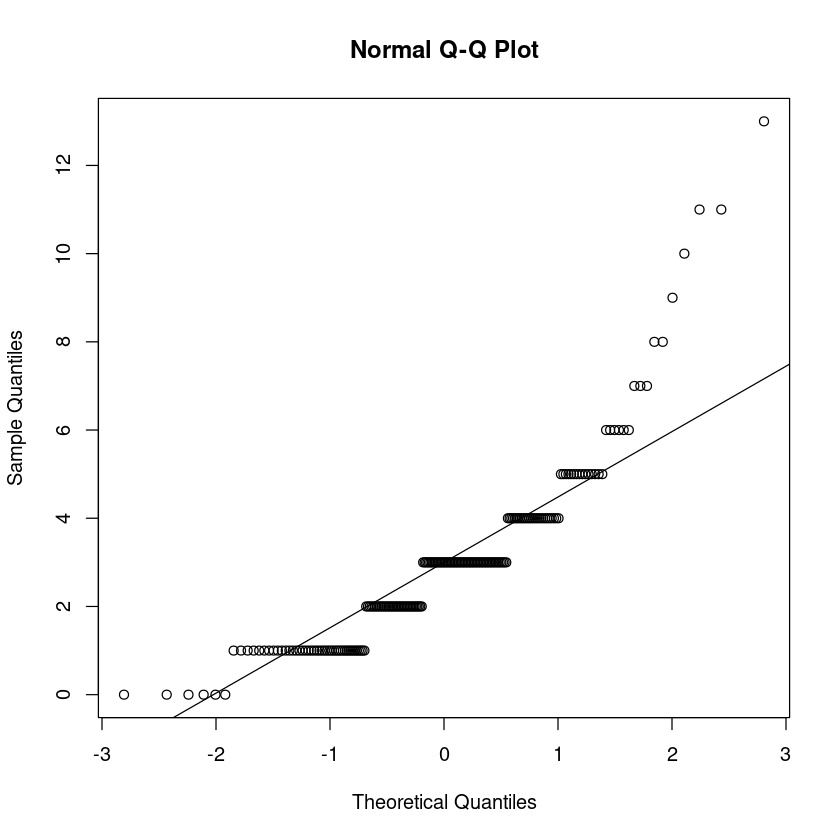

In [38]:
# Q-Q plot for men's and women's data
qqnorm(men_data_f$total_goals)
qqline(men_data_f$total_goals)

qqnorm(women_data_f$total_goals)
qqline(women_data_f$total_goals)

total_goals is not normally distributed, so we use Wilcoxon-Mann-Whitney test of two groups

# 5. Performing the hypothesis test

## Wilcoxon-Mann-Whitney test

In [39]:
test_result <- wilcox.test(women_data_f$total_goals, men_data_f$total_goals, alternative = "greater")
test_result

# Extract the p-value from the test result
p_val <- test_result$p.value

cat('The p-value is:', p_val)


	Wilcoxon rank sum test with continuity correction

data:  women_data_f$total_goals and men_data_f$total_goals
W = 43273, p-value = 0.005107
alternative hypothesis: true location shift is greater than 0


The p-value is: 0.00510661

# 6. Interpreting the result of the hypothesis test

In [40]:
alpha <- 0.1

# Determine the result based on the p-value and significance level
result <- ifelse(p_val <= alpha, "reject", "fail to reject")

# Create a data frame to store the p-value and result
result_df <- data.frame(p_val, result)

print(result_df)

       p_val result
1 0.00510661 reject


Based on this result, since the p-value (0.00510661-75) is less than the significance level (0.1), we reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference between the two groups. The mean number of goals scored in women's international soccer matches is greater than men's.